In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print('Numpy: ', np.__version__)
print('Pandas: ', pd.__version__)

Numpy:  1.21.5
Pandas:  1.4.2


### Import CSV File

In [19]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',delimiter=',',skiprows= 0, header=0)
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


### DATA MUNGLING

In [3]:
data.shape

(7043, 21)

In [6]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [23]:
data['TotalCharges'] = data['TotalCharges'].replace(r'^\s*$', np.nan, regex=True)
data['TotalCharges'] = data['TotalCharges'].astype(float)
data.dtypes

#This kind of error ValueError: could not convert string to float:  can occur when reading a dataframe from a csv file with types as df = df[['p']].astype({'p': float}). If the csv was recorded with empty spaces, python will not recognize the space character as a nan. You will need to overwrite empty cells with NaN with df = df.replace(r'^\s*$', np.nan, regex=True)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
data.index

RangeIndex(start=0, stop=7043, step=1)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  tenure            7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
### REARRANGE COLUMN, GROUP 'TENURE' WITH CUSTOMER INFORMATION COLUMNS

In [24]:

data = data[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'tenure','Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn' ]]

data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### HANDLING MISSING VALUES

In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.isnull().sum().sum()

0

In [5]:
data.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

### Data Profiling

In [8]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [126]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
tenure                73
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

### Calculate Churn Rate

The calculation of churn can be straightforward to start off with. Take the number of customers that you lost last period and divide that by the number of customers that you started with last period. The resulting percentage is your churn rate.

Typical churn rate in telecom is 21%


In [25]:
churnNO= data['Churn'] == "No"
churnYES= data['Churn'] == 'Yes'

print(churnYES.sum())
print(churnNO.sum())

churnRate = churnYES.sum() / (churnNO.sum()+ churnYES.sum())
print("Churn Rate for this month in terms of subscribers is ... " +  str(churnRate.round(2)))



1869
5174
Churn Rate for this month in terms of subscribers is ... 0.27


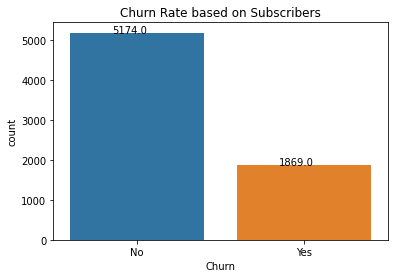

In [26]:
ax = sns.countplot(x="Churn", data=data)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

ax.set_title('Churn Rate based on Subscribers');
    
plt.show()

In [27]:
churnNoCharges = data[ data['Churn']== 'No'] ['TotalCharges'].sum()

churnYesCharges = data[ data['Churn']== 'Yes'] ['TotalCharges'].sum()

print(churnYesCharges)
print(churnNoCharges)
churnRateCharges = churnYesCharges / (churnYesCharges + churnNoCharges)
print(churnRateCharges)
#print("Churn Rate for this month in terms of Revenue is ... " +  str(churnRateCharges.round(2)))



2862926.9
13193241.8
0.17830697680698882


       TotalCharges
Churn              
No       13193241.8
Yes       2862926.9


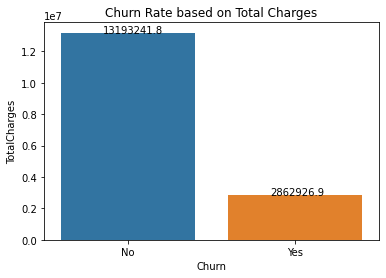

In [72]:
data_charges= data.groupby('Churn')[['TotalCharges']].sum()
print(data_charges)
#plt.bar(x=data_charges.index, height = 'TotalCharges', data=data_charges, color= ['r','b'])

#plt.xlabel("Churn")
#plt.ylabel("Total Charges in M$")
#plt.show()
   
plt.figure(figsize=(6,4))
ax = sns.barplot(x= data_charges.index, y='TotalCharges', data=data_charges)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

ax.set_title('Churn Rate based on Total Charges');

plt.show()




### 1st Observation:  churn rate for this period is high at 27% compared to 21% industry norm




### A. Relation between Churn and Demographics

In [11]:

demographics=data.loc[ data['Churn'] == 'Yes', ['gender','SeniorCitizen', 'Partner','Dependents']]
demographics.head()



,gender,SeniorCitizen,Partner,Dependents
2,Male,0,No,No
4,Female,0,No,No
5,Female,0,No,No
8,Female,0,Yes,No
13,Male,0,No,No


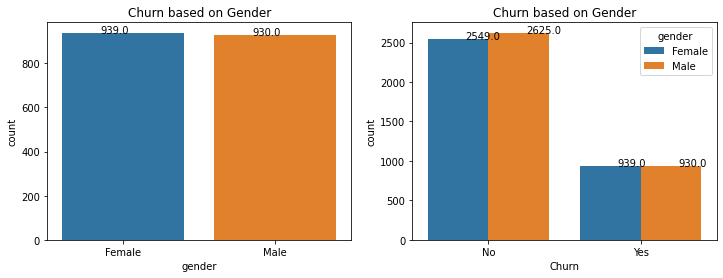

In [34]:
plt.figure(figsize=(12,4))
ax= plt.subplot(121)
ax = sns.countplot(x="gender", data=demographics, order= ['Female', 'Male'] )

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

ax.set_title('Churn based on Gender')

ax = plt.subplot(122)
ax = sns.countplot(x="Churn", data=data, hue='gender')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title('Churn based on Gender')

plt.show()


#palette=['#432371', "#FAAE7B"]

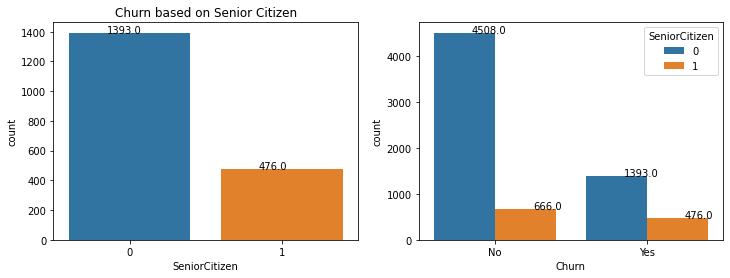

In [12]:
plt.figure(figsize=(12,4))

ax = plt.subplot(121)
ax = sns.countplot(x="SeniorCitizen", data=demographics )

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title('Churn based on Senior Citizen')


ax= plt.subplot(122)
ax = sns.countplot(x="Churn", data=data, hue='SeniorCitizen')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

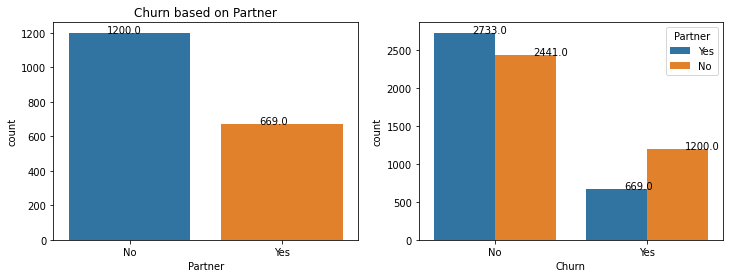

In [13]:
plt.figure(figsize=(12,4))

ax = plt.subplot(121)
ax = sns.countplot(x="Partner", data=demographics,order=['No', 'Yes'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title('Churn based on Partner')

ax= plt.subplot(122)
ax = sns.countplot(x="Churn", data=data, hue='Partner', order=['No', 'Yes']  )
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


plt.show()

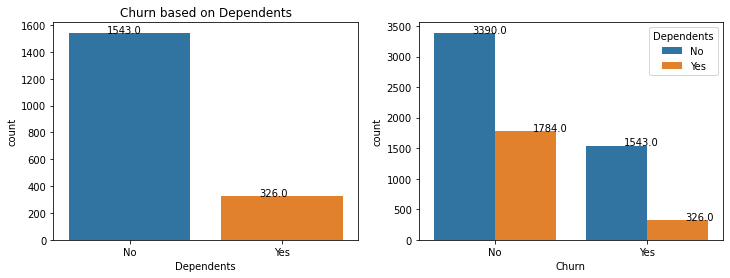

In [14]:
plt.figure(figsize=(12,4))

ax = plt.subplot(121)
ax = sns.countplot(x="Dependents", data=demographics, order=['No', 'Yes'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title('Churn based on Dependents')

ax= plt.subplot(122)
ax = sns.countplot(x="Churn", data=data, hue='Dependents')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

### 2rd Observation: Profile of churn - No major differentiation between male or female, most are not senior citizen with no dependents (which may explain why they are risk takers) 

### B. Relation between Churn and Services

In [15]:
services=data.loc[ data['Churn'] == 'Yes', ['PhoneService','MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]
services.head()


,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
2,Yes,No,DSL,Yes,Yes,No,No,No,No
4,Yes,No,Fiber optic,No,No,No,No,No,No
5,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
8,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
13,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes


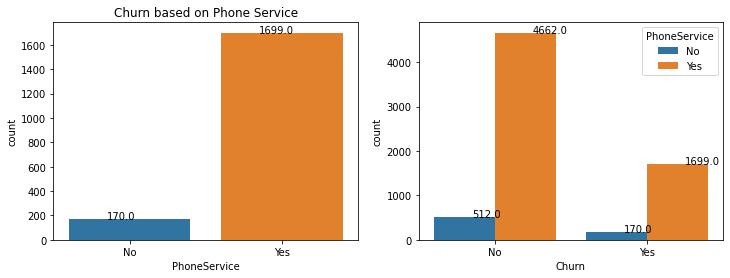

In [86]:
plt.figure(figsize=(12,4))

ax = plt.subplot(121)
ax = sns.countplot(x="PhoneService", data=services, order=['No', 'Yes'] )

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title('Churn based on Phone Service')

ax= plt.subplot(122)
ax = sns.countplot(x="Churn", data=data, hue='PhoneService')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

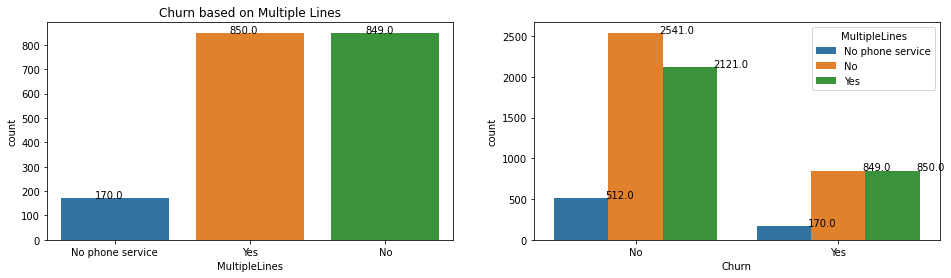

In [16]:
plt.figure(figsize=(16,4))

ax = plt.subplot(121)
ax = sns.countplot(x="MultipleLines", data=services, order=['No phone service', 'Yes', 'No']  )

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title('Churn based on Multiple Lines')

ax= plt.subplot(122)
ax = sns.countplot(x="Churn", data=data, hue='MultipleLines' )
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


plt.show()

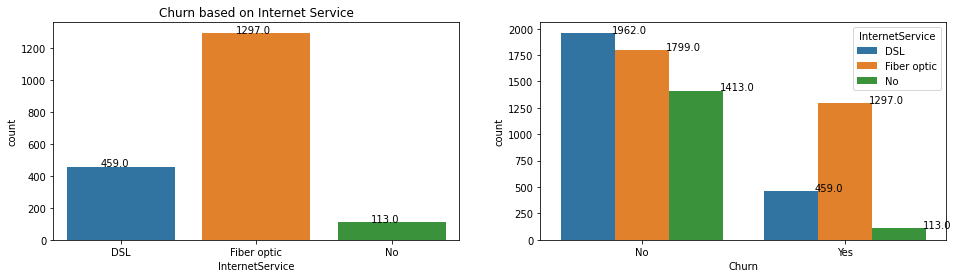

In [17]:
plt.figure(figsize=(16,4))

ax = plt.subplot(121)
ax = sns.countplot(x="InternetService", data=services)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title('Churn based on Internet Service')

ax= plt.subplot(122)
ax = sns.countplot(x="Churn", data=data, hue='InternetService')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


plt.show()

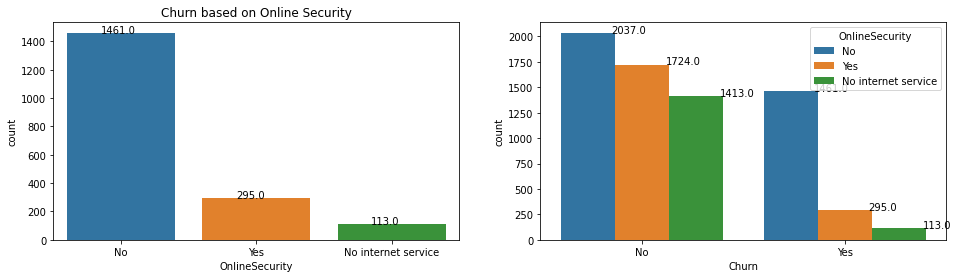

In [88]:
plt.figure(figsize=(16,4))

ax = plt.subplot(121)
ax = sns.countplot(x="OnlineSecurity", data=services, order=['No', 'Yes','No internet service'] )
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title('Churn based on Online Security')


ax= plt.subplot(122)
ax = sns.countplot(x="Churn", data=data, hue='OnlineSecurity')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

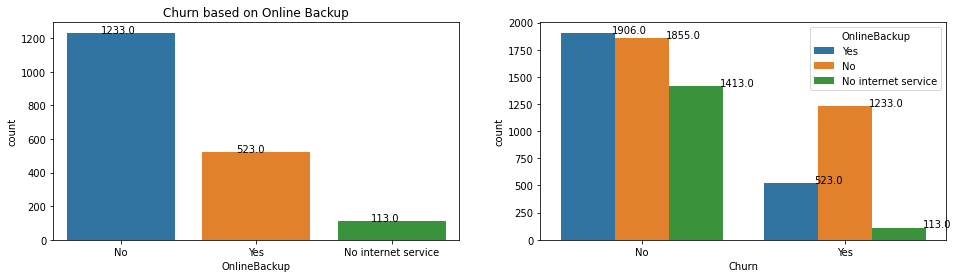

In [18]:
plt.figure(figsize=(16,4))

ax = plt.subplot(121)
ax = sns.countplot(x="OnlineBackup", data=services, order=['No', 'Yes','No internet service'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title('Churn based on Online Backup')


ax= plt.subplot(122)
ax = sns.countplot(x="Churn", data=data, hue='OnlineBackup')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


plt.show()

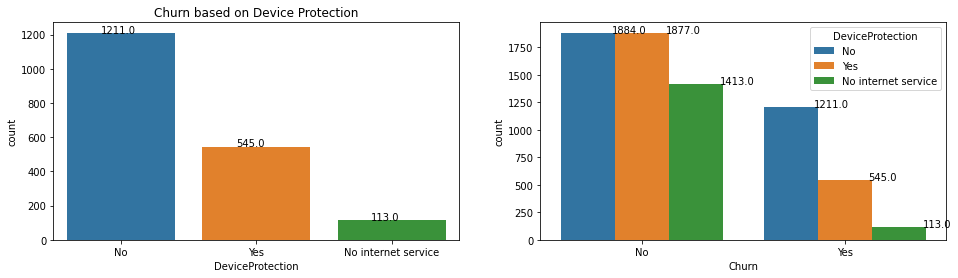

In [90]:
plt.figure(figsize=(16,4))

ax = plt.subplot(121)
ax = sns.countplot(x="DeviceProtection", data=services)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title('Churn based on Device Protection')

ax= plt.subplot(122)
ax = sns.countplot(x="Churn", data=data, hue='DeviceProtection')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


plt.show()

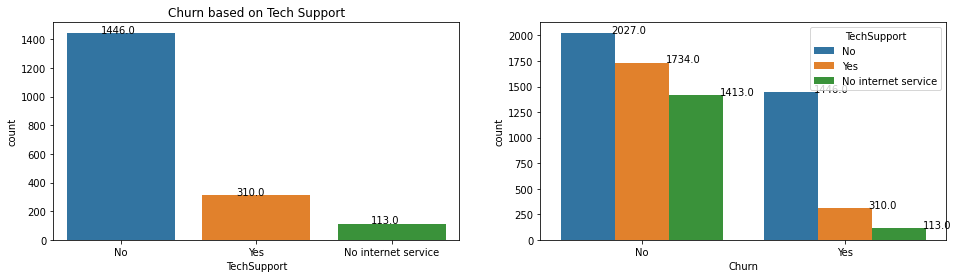

In [19]:
plt.figure(figsize=(16,4))

ax = plt.subplot(121)
ax = sns.countplot(x="TechSupport", data=services)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title('Churn based on Tech Support')

ax= plt.subplot(122)
ax = sns.countplot(x="Churn", data=data, hue='TechSupport')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


plt.show()

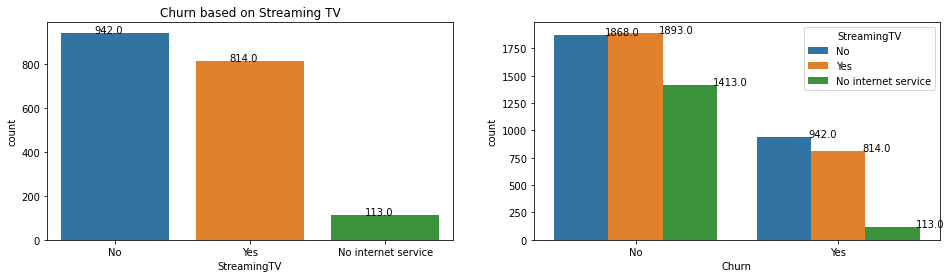

In [92]:
plt.figure(figsize=(16,4))

ax = plt.subplot(121)
ax = sns.countplot(x="StreamingTV", data=services)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title('Churn based on Streaming TV')

ax= plt.subplot(122)
ax = sns.countplot(x="Churn", data=data, hue='StreamingTV')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

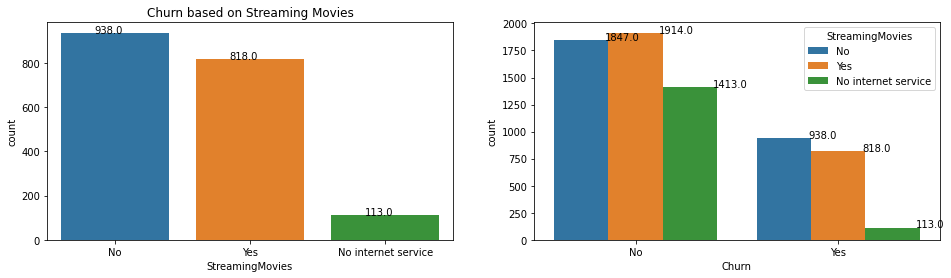

In [20]:
plt.figure(figsize=(16,4))

ax = plt.subplot(121)
ax = sns.countplot(x="StreamingMovies", data=services)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title('Churn based on Streaming Movies')

ax= plt.subplot(122)
ax = sns.countplot(x="Churn", data=data, hue='StreamingMovies')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

### 3rd Observation : Relation betwen churn and services:

- Phone service - majority with
- Multiple lines - no discernible difference
- Fibre optic internet - majority with
- Online security - majority without
- Online Backup - majority without
- Device protection - majority without 
- Tech support - majority without 
- streaming TV - no discernible difference
- streaming movies - no discernible difference

It appears that most subscribers who churn sign up to be users of services only, but do not appreciate the value-added services of their telco such as tech support, online security, online backup, device protection. Hence there is little stickiness.

### C. Relation between Churn and Customer Account


In [29]:
cust=data.loc[ data['Churn'] == 'Yes', ['tenure','Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges']]
cust.head()

,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
2,2,Month-to-month,Yes,Mailed check,53.85
4,2,Month-to-month,Yes,Electronic check,70.70
5,8,Month-to-month,Yes,Electronic check,99.65
8,28,Month-to-month,Yes,Electronic check,104.80
13,49,Month-to-month,Yes,Bank transfer (automatic),103.70


Text(0, 0.5, 'Tenure in terms of months')

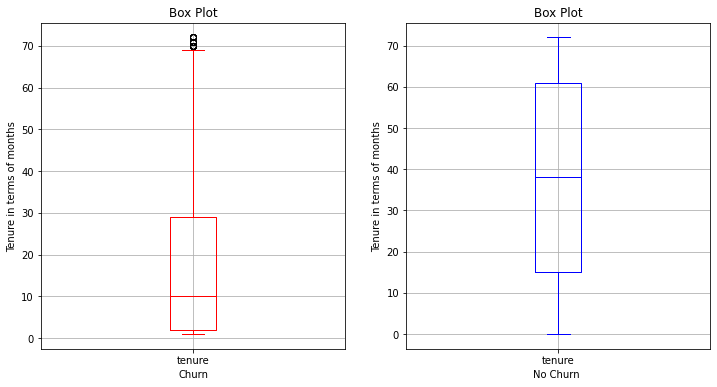

In [31]:
custstay=data.loc[ data['Churn'] == 'No', ['tenure', 'MonthlyCharges']]

dist1 = cust['tenure']
dist2 = custstay['tenure']

fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
dist1.plot(kind='box', color='red', vert=True, figsize=(12, 6), ax=ax0, grid=True) # add to subplot 1
ax0.set_title('Box Plot')
ax0.set_xlabel('Churn')
ax0.set_ylabel('Tenure in terms of months')

# Subplot 2: Box plot
dist2.plot(kind='box', color='blue', vert=True, figsize=(12, 6), ax=ax1, grid=True) # add to subplot 2
ax1.set_title('Box Plot')
ax1.set_xlabel('No Churn ')
ax1.set_ylabel('Tenure in terms of months')

In [19]:
#custstay=data.loc[ data['Churn'] == 'No', ['tenure', 'MonthlyCharges']]

#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True,figsize=(10,6))

#dist1 = cust['tenure']
#dist2 = custstay['tenure']

# We can set the number of bins with the *bins* keyword argument.
#axs[0].hist(dist1, bins=4, color='r')
#axs[1].hist(dist2, bins=4, color='b')


#axs[0].set_title('Histogram of Tenure for Churn')
#axs[0].set_xlabel('Number of Months')
#axs[0].set_ylabel('Count')

#axs[1].set_title('Histogram of Tenure for No Churn')
#axs[1].set_xlabel('Number of Months')

#axs[0].grid(axis = 'y')
#axs[1].grid(axis = 'y')

#axs[0].grid(axis = 'x')
#axs[1].grid(axis = 'x')

#plt.show()

In [20]:
#cust['tenure'].plot(kind='hist', figsize=(8, 5), bins=5, color= 'r')

# add a title to the histogram
#plt.title('Histogram of Tenure of Churn')
# add y-label
#plt.ylabel('Count')
# add x-label
#plt.xlabel('Tenure in terms of number of months')

#plt.show()

In [21]:
#custstay=data.loc[ data['Churn'] == 'No', ['tenure', 'MonthlyCharges']]

#custstay['tenure'].plot(kind='hist', figsize=(8, 5), bins=5, color= 'b')

# add a title to the histogram
#plt.title('Histogram of Tenure - No Churn')
# add y-label
#plt.ylabel('Count')
# add x-label
#plt.xlabel('Tenure in terms of number of months')

#plt.show()

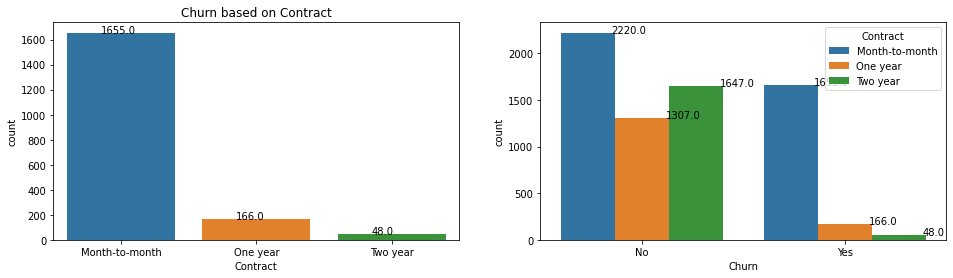

In [32]:
plt.figure(figsize=(16,4))

ax = plt.subplot(121)
ax = sns.countplot(x='Contract', data=cust, order=['Month-to-month', 'One year','Two year'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title('Churn based on Contract')

ax= plt.subplot(122)
ax = sns.countplot(x="Churn", data=data, hue='Contract')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


plt.show()

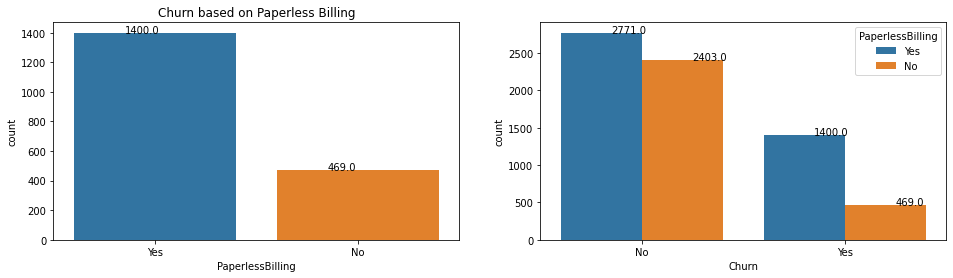

In [33]:
plt.figure(figsize=(16,4))

ax = plt.subplot(121)
ax = sns.countplot(x='PaperlessBilling', data=cust)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title('Churn based on Paperless Billing')


ax= plt.subplot(122)
ax = sns.countplot(x="Churn", data=data, hue='PaperlessBilling')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


plt.show()

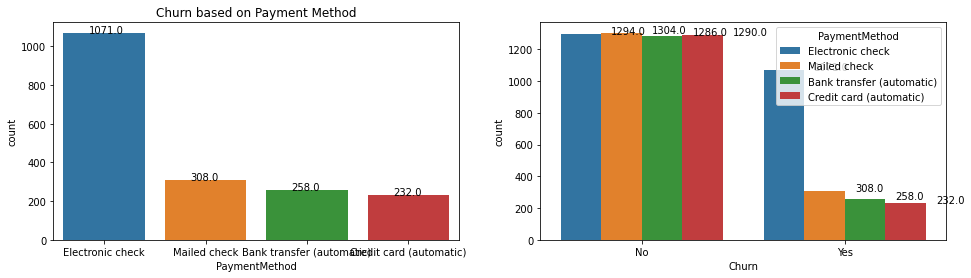

In [34]:
plt.figure(figsize=(16,4))

ax = plt.subplot(121)
ax = sns.countplot(x='PaymentMethod', data=cust, order=[ 'Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)']  )
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title('Churn based on Payment Method')


ax= plt.subplot(122)
ax = sns.countplot(x="Churn", data=data, hue='PaymentMethod')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

Text(0, 0.5, 'Monthly Charges')

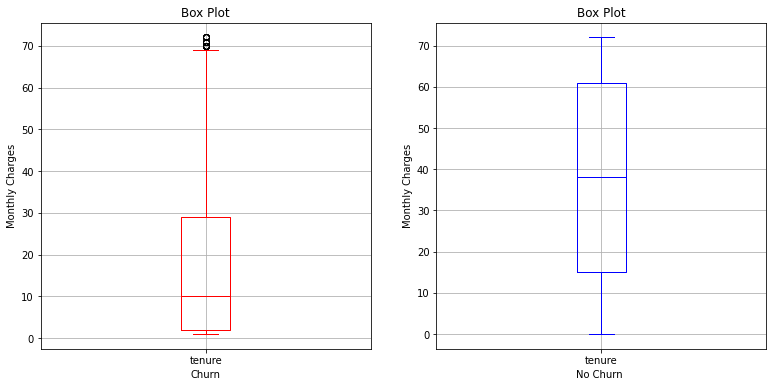

In [35]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
dist1.plot(kind='box', color='red', vert=True, figsize=(13, 6), ax=ax0, grid=True) # add to subplot 1
ax0.set_title('Box Plot')
ax0.set_xlabel('Churn')
ax0.set_ylabel('Monthly Charges')

# Subplot 2: Box plot
dist2.plot(kind='box', color='blue', vert=True, figsize=(13, 6), ax=ax1, grid=True) # add to subplot 2
ax1.set_title('Box Plot')
ax1.set_xlabel('No Churn ')
ax1.set_ylabel('Monthly Charges')

### 4th Observation : Relation between churn and customer account:

- tenure - majority less than 15 months
- Contract - majority month-to-month 
- Paperless billing - majority with
- Payment method - electronic check
- Monthly charges - Majority in range of $80 to 100

It appears that most subscribers who churn are with the telco for less than 10 months. They have a month-by-month contract which offers little discentive for churn, majority has paperless billing with monthly charges in the range of $80 compared to those who do not churn most of whom pay $62.